In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import random

import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize



In [2]:
df = pd.read_csv("filtered_df_clustered_lemmitized.csv")


In [3]:
all_clusters = []
for c in range(100):
    cluster = df[df["lem_clusters"]==c][["definition", "prism:publicationName", "title","non-stop-words"]].reset_index(drop=True)
    print(" ---------------- ")
    print("CLUSTER #", c)
    this_cluster = []
    for i in range(len(cluster)):
        this_cluster.append(cluster.loc[i]["non-stop-words"].lower())
        print(cluster.loc[i]["non-stop-words"])
    all_clusters.append(this_cluster)

 ---------------- 
CLUSTER # 0
digital twin digital representation physical asset reproducing data model , behavior , communication physical assets. ” [ 48 ] 2021.7 “ digital twin virtual model physical entity , dynamic , bi-directional links physical entity corresponding twin digital domain. ” Table 4 Cyber-Physical System definition
 ---------------- 
CLUSTER # 1
digital twin virtual replica hardware successfully constructed utilized different manufacturing processes many industries government agencies
digital twin virtual double product , machine , process complete production facility
Digital twin concept origins product lifecycle management ( PLM )
digital twin complete , application-independent digital description products , devices , machines , plants , factories , systems processes
digital twin model entire asset , piece manufacturing equipment , motor pump
Digital twin virtual model process , product service
Digital twin defined virtual representation manufacturing elements man

In [4]:
all_clusters_filtered = []
for cluster in all_clusters:
    all_clusters_filtered.append(random.choice(cluster))
all_clusters_filtered

['digital twin digital representation physical asset reproducing data model , behavior , communication physical assets. ” [ 48 ] 2021.7 “ digital twin virtual model physical entity , dynamic , bi-directional links physical entity corresponding twin digital domain. ” table 4 cyber-physical system definition',
 'digital twin virtual prototype real physical product , product group process , main purpose twin collect use digital information entire life cycle object',
 'digital twin database data-centric application ( rauch pietrzyk , 2019 )',
 'digital twin virtual environment designed accurately reflect physical objects people , devices , processes , complex environments , buildings help make model-driven decisions',
 'digital twin digital representation physical object , process , service',
 'digital twin holistic term designed encapsulate required components ensuring high performing , reliable , yet cost effective , structure',
 'digital twin real-time high-fidelity reflection physical 

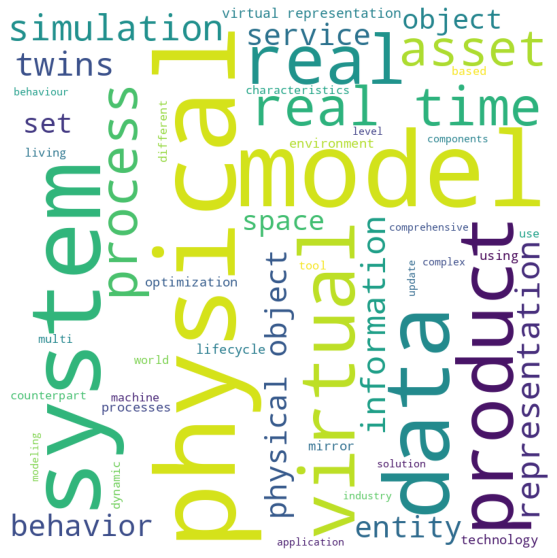

In [5]:
# for i, text in enumerate(all_clusters):
#     print(i)
#     text = text.lower().replace(",", "").replace(".", "").replace("!", "")

#     # Create WordCloud object
#     wordcloud = WordCloud(
#         width=800,
#         height=600,
#         max_words=50,
#         stopwords=["the", "a", "an", "is", "of", "digital", "twin"],
#         background_color="white",
#         colormap="viridis",
#     )

#     # Generate word cloud
#     wordcloud.generate(text=text)

#     # Display word cloud
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.show()

plt.figure(figsize=(10, 10))
text = " ".join(all_clusters_filtered).replace(" et al.", " ")

# Create WordCloud object
wordcloud = WordCloud(
    width=800,
    height=800,
    max_words=50,
    stopwords=["the", "a", "an", "is", "of", "digital", "twin", "et" "al", "et al", "et al", "defined", "describes", "et al."],
    background_color="white",
    
    # colormap="viridis",
)

# Generate word cloud
wordcloud.generate(text=text)

# Display word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
wordcloud.to_file("dd.jpg")

# N-gram frequency analysis

In [31]:
# Tokenize
tokens = word_tokenize(" ".join(all_clusters_filtered).replace(" et al.", " "))

# Lowercase (optional)
tokens = [token.lower() for token in tokens]
stopwords=["the", "a", "an", "is", "of", "digital", "twin", "twins", "also", "f","r", "e"]
# Remove punctuation (optional)
import string
nonpunct_tokens = [token for token in tokens if token not in string.punctuation and token not in stopwords and len(token) > 2]

# Use 'nonpunct_tokens' if punctuation removal is applied
tokens = nonpunct_tokens

def calculate_n_gram_frequencies(tokens, n_max):
    """Calculates frequencies for n-grams from 1 to n_max.

    Args:
        tokens: A list of preprocessed text tokens.
        n_max: The maximum n-gram size to consider.

    Returns:
        A dictionary containing n-grams and their frequencies.
    """

    n_gram_freqs = {}
    for n in range(1, n_max + 1):
        ngram_generator = ngrams(tokens, n)
        n_gram_freqs[n] = nltk.FreqDist(ngram_generator)
    return n_gram_freqs

# Example usage
n_gram_freqs = calculate_n_gram_frequencies(tokens, 3)


In [32]:
n_gram_freqs

{1: FreqDist({('physical',): 44, ('system',): 27, ('data',): 25, ('virtual',): 25, ('model',): 22, ('representation',): 16, ('real',): 16, ('product',): 16, ('process',): 13, ('simulation',): 11, ...}),
 2: FreqDist({('virtual', 'representation'): 7, ('representation', 'physical'): 6, ('physical', 'system'): 6, ('physical', 'object'): 5, ('real', 'time'): 5, ('physical', 'asset'): 4, ('virtual', 'model'): 4, ('physical', 'entity'): 4, ('park', '2019'): 4, ('life', 'cycle'): 3, ...}),
 3: FreqDist({('2018', 'tao', '2018'): 3, ('virtual', 'model', 'physical'): 2, ('representation', 'physical', 'object'): 2, ('set', 'virtual', 'information'): 2, ('virtual', 'information', 'constructs'): 2, ('information', 'constructs', 'fully'): 2, ('constructs', 'fully', 'describes'): 2, ('fully', 'describes', 'potential'): 2, ('describes', 'potential', 'actual'): 2, ('potential', 'actual', 'physical'): 2, ...})}

In [36]:

for k, v in n_gram_freqs.items():
    print(k, "- GRAM ")
    for k2, v2 in v.items():
        if v2 > 1 and k ==1:
            for i in k2:
                print(i, end=" ")
            print(v2)
    print("  ---------------- ")

1 - GRAM 
representation 16
physical 44
asset 10
data 25
model 22
behavior 7
communication 2
assets 2
virtual 25
entity 8
dynamic 5
links 2
domain 3
table 2
cyber-physical 2
system 27
real 16
product 16
process 13
use 3
information 10
life 5
cycle 3
object 10
application 3
2019 10
environment 4
designed 2
accurately 2
objects 5
processes 6
complex 4
environments 2
help 2
make 2
service 6
components 4
ensuring 2
performing 2
structure 3
real-time 9
high-fidelity 3
entities 2
defined 9
set 7
constructs 2
fully 2
describes 4
potential 3
actual 3
manufactured 2
micro 2
atomic 2
level 4
macro 2
geometrical 2
form 3
represents 3
network 2
simulation 11
integrates 3
parameters 3
multiscale 2
models 11
modeling 4
predicting 2
connection 2
lifecycle 6
space 5
characteristics 5
time 6
evolution 2
methods 2
technology 6
industry 4
operational 2
intelligence 3
decision-making 2
key 2
smart 2
performance 3
maintenance 3
throughout 2
mirror 5
element 3
4.0 3
comprehensive 4
individual 2
2018 11
copy